In [57]:
import clustbench  # library with benchmark datasets
import genieclust  # library with Genie clustering algorithm, validity measures, plotting etc.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [8]:
# example taken from:
# https://clustering-benchmarks.gagolewski.com/weave/clustbench-usage.html

In [9]:
# !pip3 install clustering-benchmarks

In [10]:
# load the data from the url link
battery = "wut"
dataset = "x2"
data_url = "https://github.com/gagolews/clustering-data-v1/raw/v1.1.0"
b = clustbench.load_dataset(battery, dataset, url=data_url)

In [14]:
# labels for two cases: 3 clusters or 4 clusters and noise
b.labels

[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0,
        1, 0, 1, 1, 1, 4, 1, 4, 0, 1, 0, 1, 2, 2, 0, 3, 1, 1, 1, 4, 1, 0,
        4, 1, 1, 4, 4, 2, 1, 1, 4, 0, 1, 0, 1, 1, 4, 2, 1, 0, 1, 1, 1, 4,
        4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3])]

In [44]:
# number of clusters
b.n_clusters

array([3, 4])

In [11]:
# dictionary with the results
res = {}

C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


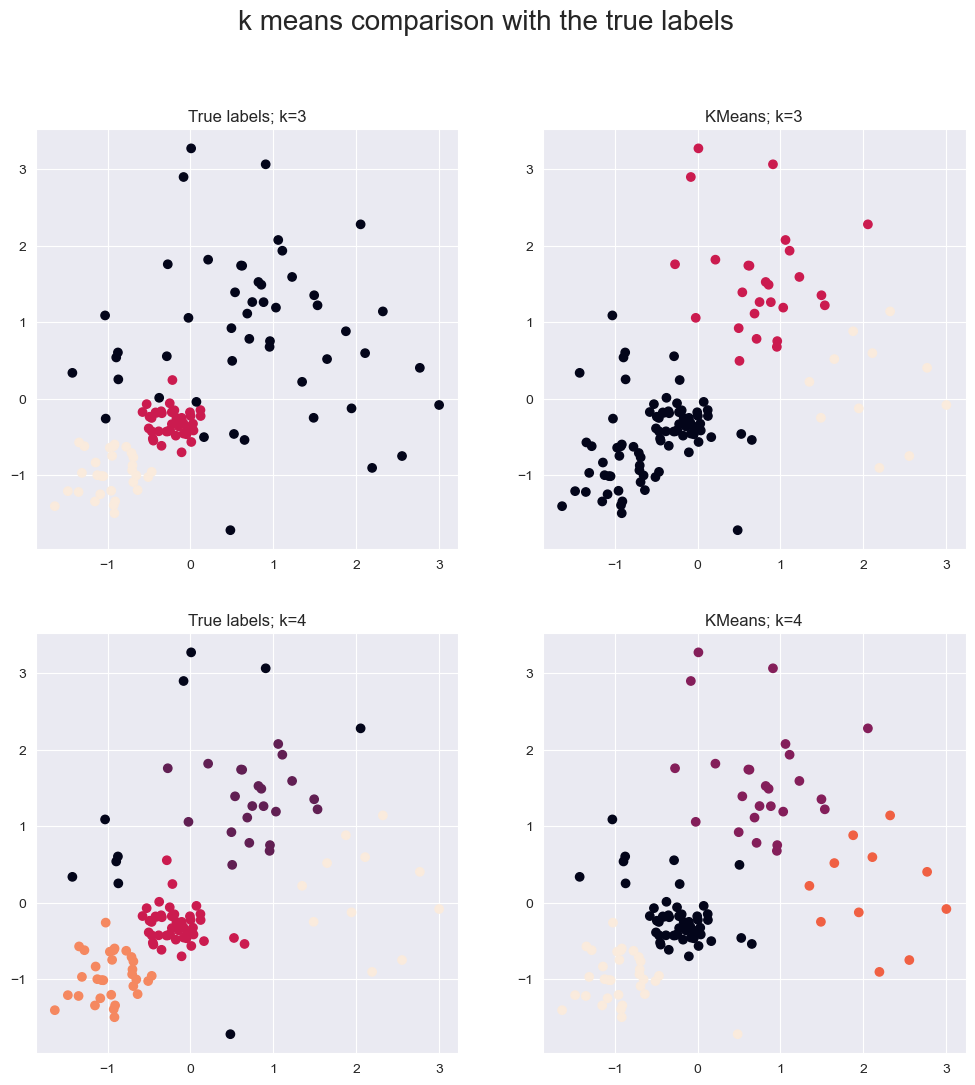

In [43]:
m = KMeans(n_init=10)
res["KMeans"] = clustbench.fit_predict_many(m, b.data, b.n_clusters)
clustbench.get_score(b.labels, res["KMeans"])

method = "KMeans"
# plt.figure(figsize=(12, 12))
# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle("k means comparison with the true labels", fontsize=20)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate plots
for i, ax in enumerate(axes):
    k=b.n_clusters[int(i/2)]
    if i%2==0:
        ax.scatter(
            x=b.data[:, 0],
            y=b.data[:, 1],
            c=b.labels[k-3]
        )
        ax.set_title(f"True labels; k={k}")
    else:
        ax.scatter(
            x=b.data[:, 0],
            y=b.data[:, 1],
            c=res[method][k]
        )
        ax.set_title(f"{method}; k={k}")

plt.show()

In [56]:
# comparing these two clusterings using Calinski-Harabasz index
# https://genieclust.gagolewski.com/genieclust_cluster_validity.html#genieclust.cluster_validity.calinski_harabasz_index

chi3 = genieclust.cluster_validity.calinski_harabasz_index(b.data, res["KMeans"][3]-1)
chi4 = genieclust.cluster_validity.calinski_harabasz_index(b.data, res["KMeans"][4]-1)
# clusters should be labelled from 0 to k-1, not from 1 to k.
# thus, we substract 1 from labels. if not, we get an error: ValueError: min(y) != 0.

print("Calinski-Harabasz index for k-means with 3 clusters is:", chi3)
print("Calinski-Harabasz index for k-means with 4 clusters is:", chi4)

# "The greater the index value, the more valid (whatever that means) the assessed partition"

Calinski-Harabasz index for 3 clusters is: 149.74414194562905
Calinski-Harabasz index for 4 clusters is: 160.8848505195547


Calinski-Harabasz index for DBSCAN is: 60.937606054838895


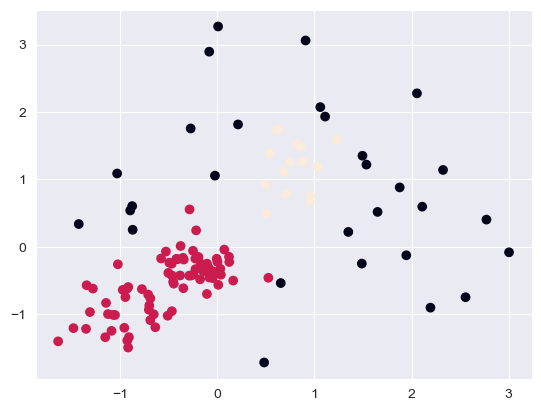

In [75]:
# Comparing also with DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(b.data)

plt.scatter(x=b.data[:,[0]], y=b.data[:,[1]], c=dbscan_labels)

# clusters should be labelled from 0 to k-1, not from -1 to k-2.
# thus, we add 1 to labels. if not, we get an error: ValueError: min(y) != 0.
chi_dbscan = genieclust.cluster_validity.calinski_harabasz_index(b.data, dbscan_labels+1)
print("Calinski-Harabasz index for DBSCAN is:", chi_dbscan)

# computing calinski_harabasz_index here probably does not make sense, since noise points are not another cluster

In [46]:
# more about internal validity measures:
# https://clustering-benchmarks.gagolewski.com/weave/internal-validity-measures.html

In [ ]:
# more about external validity measures:
# https://clustering-benchmarks.gagolewski.com/weave/external-validity-measures.html

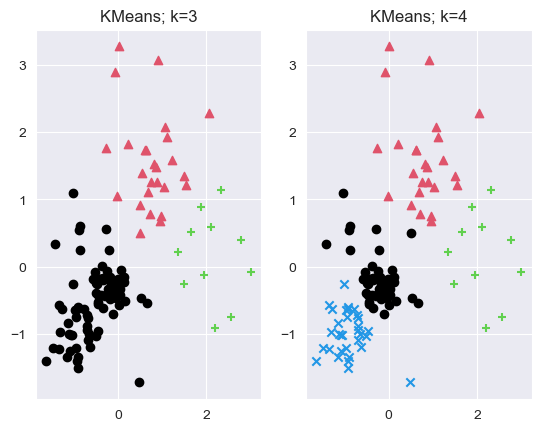

In [77]:
# plot generated using genieclust - not only colour but also shape is different for each cluster

method = "KMeans"
for i, k in enumerate(res[method].keys()):
    plt.subplot(1, len(res[method]), i+1)
    genieclust.plots.plot_scatter(
        b.data, labels=res[method][k]-1, title=f"{method}; k={k}"
    )
plt.show()